<a href="https://colab.research.google.com/github/geryabra/DataVisualization/blob/main/Matplotlib_PART_2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib - Part 2

## Recap from Last Lesson

In the previous lesson we

*   Got familiar with the anatomy of matplotlib
*   Created a line plot

Today we want to make few more steps forward, but first, just because 2 weeks pased since our last leson, lets very quickly create a similar line plot and rimind ourselves what each function does.

## We want to create the following plot

The data behind it is the `taxi` data set.<br>
the words "green" and "yellow" in the legend refer to the taxi's color.

The values on the y-axis are the payment per ride, and the values in the x-axis are the dates in which the ride took place.

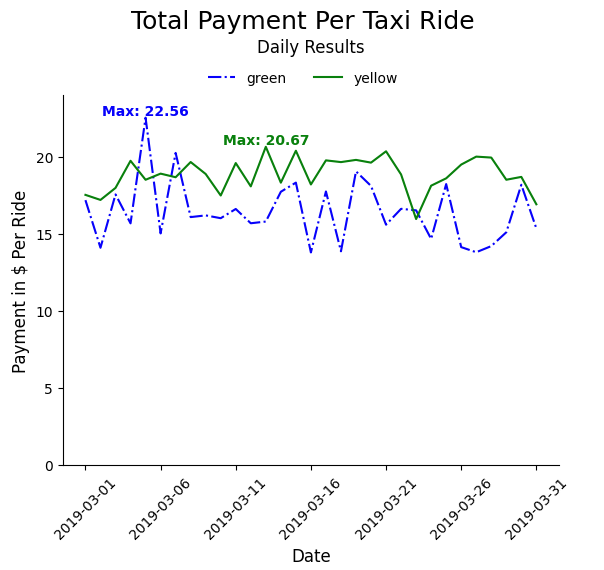


## Import Packages

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

## Read the Data

In [ ]:
taxis = sns.load_dataset('taxis', parse_dates=['pickup','dropoff'])

In [ ]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
taxis.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [ ]:
taxis.pickup_borough.unique()


array(['Manhattan', 'Queens', nan, 'Bronx', 'Brooklyn'], dtype=object)

In [ ]:
taxis.dropoff_borough.unique()


array(['Manhattan', 'Queens', 'Brooklyn', nan, 'Bronx', 'Staten Island'],
      dtype=object)

### Preparing the data

__Remember:__ `plt.plot()` plots the index on the x axis and the column on the y axis. Therefore, when we wish to plot a line chart with matplotlib, we must first bring the data to the following form, where the __date is in the index__ and each line we desire can be found as a column.

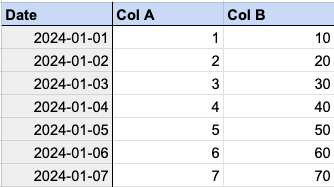


### 🔍 Understanding the GroupBy Aggregation Code

The code groups the taxi dataset by both `pickup_date` and `color`, creating a unique group for every date-color combination. Using the `.agg()` function, it calculates two values for each group: the total sum of the `total` column (which represents total payments), and the count of rows (number of rides). These results are stored in new columns named `total_sum` and `count`. Finally, `.reset_index()` is used to convert the grouped indices back into normal columns, producing a clean DataFrame ready for further analysis or visualization.


In [ ]:
# Create a new column for the pickup date (YYYY-MM-DD)
taxis['pickup_date'] = taxis['pickup'].dt.date

# Group by pickup_date and color, then calculate the required value
result = taxis.groupby(['pickup_date', 'color']).agg(
    total_sum=('total', 'sum'),
    count=('total', 'count')
).reset_index()


In [ ]:
result.head()

,pickup_date,color,total_sum,count
0,2019-02-28,green,6.30,1
1,2019-03-01,green,739.72,43
2,2019-03-01,yellow,3474.11,198
3,2019-03-02,green,409.22,29
4,2019-03-02,yellow,2909.80,169


In [ ]:
result.sort_values(by='pickup_date', ascending=True).head(5)


,pickup_date,color,total_sum,count
0,2019-02-28,green,6.30,1
1,2019-03-01,green,739.72,43
2,2019-03-01,yellow,3474.11,198
3,2019-03-02,green,409.22,29
4,2019-03-02,yellow,2909.80,169


In [ ]:
result.head(5)

,pickup_date,color,total_sum,count
0,2019-02-28,green,6.30,1
1,2019-03-01,green,739.72,43
2,2019-03-01,yellow,3474.11,198
3,2019-03-02,green,409.22,29
4,2019-03-02,yellow,2909.80,169


To achieve our goal of showing average payment per ride per day for each taxi color, we need to divide the total payment by the number of rides in each group.

In [ ]:
result['payment_per_ride'] = result['total_sum'] / result['count']
result.head(7)

,pickup_date,color,total_sum,count,payment_per_ride
0,2019-02-28,green,6.30,1,6.300000
1,2019-03-01,green,739.72,43,17.202791
2,2019-03-01,yellow,3474.11,198,17.546010
3,2019-03-02,green,409.22,29,14.111034
4,2019-03-02,yellow,2909.80,169,17.217751
5,2019-03-03,green,597.54,34,17.574706
6,2019-03-03,yellow,2429.78,135,17.998370


In [ ]:
result['payment_per_ride'] = result['total_sum'] / result['count']

# Pivot the table to have dates as index and colors as columns
pivot_result = result.pivot(index='pickup_date', columns='color', values='payment_per_ride')

pivot_result = pivot_result.dropna()
# Display the resulting DataFrame
pivot_result.head()


color,green,yellow
pickup_date,,
2019-03-01,17.202791,17.546010
2019-03-02,14.111034,17.217751
2019-03-03,17.574706,17.998370
2019-03-04,15.696667,19.758819
2019-03-05,22.558158,18.527211


In [ ]:
len(result)

63

In [ ]:
len(pivot_result)

31

In [ ]:
result.sort_values(by='pickup_date', ascending=True).head(4)


,pickup_date,color,total_sum,count,payment_per_ride
0,2019-02-28,green,6.30,1,6.300000
1,2019-03-01,green,739.72,43,17.202791
2,2019-03-01,yellow,3474.11,198,17.546010
3,2019-03-02,green,409.22,29,14.111034


In [ ]:
pivot_result.sort_values(by='pickup_date', ascending=False).head(4)


color,green,yellow
pickup_date,,
2019-03-31,15.366757,16.935133
2019-03-30,18.202432,18.712921
2019-03-29,15.116250,18.528270
2019-03-28,14.218889,19.967811


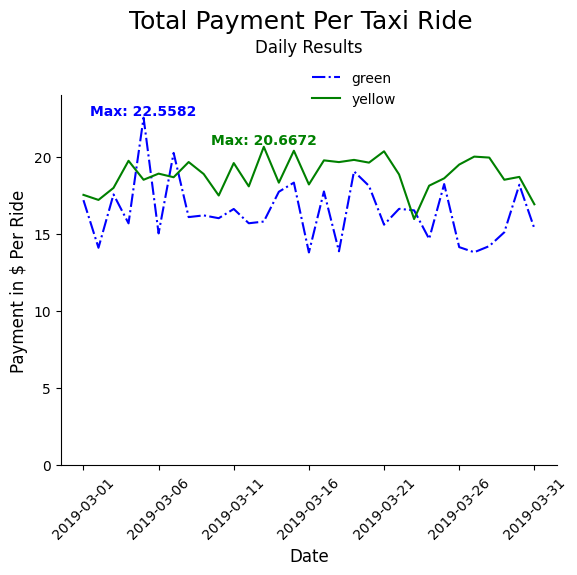

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
line1,  = ax.plot(pivot_result.index, pivot_result.green, linestyle = '-.', color = 'blue')
line2, = ax.plot(pivot_result.index, pivot_result.yellow, ls = '-', color = '#008000') # we can use linestyle or ls

# Annotate the maximum points
for line in [line1, line2]:
    x_data = line.get_xdata()
    y_data = line.get_ydata()

    # Find the index of the maximum y-value
    max_idx = np.argmax(y_data)

    # Annotate the maximum point
    ax.text(x_data[max_idx], y_data[max_idx], f'Max: {y_data[max_idx]:.4f}',
            ha='center', va='bottom', color=line.get_color(), fontsize=10, fontweight='bold')

# Addign a super title for the figure
fig.suptitle('Total Payment Per Taxi Ride', fontsize = 18, y=1.06)


# Adding a title for the axes
ax.set_title('Daily Results', fontsize = 12, y=1.095) ##y=1.095: This means that the title will be positioned slightly above the default position. The default vertical position is y=1.0, which places the title just above the top of the Axes. By setting y=1.095, the title is moved 9.5% higher than its default position.


# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Payment in $ Per Ride', fontsize = 12)

# Add a legend
ax.legend(pivot_result.columns, bbox_to_anchor=(0.7,1.1), ncol =1, frameon=False)

ax.set_xticks(pivot_result.index[::5])
plt.xticks(rotation=45)

ax.set_ylim(0,24)

# Removing top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the chart
plt.show()

In [ ]:
type(line1)

matplotlib.lines.Line2D

In [ ]:
y_data = line.get_ydata()
y_data


array([17.5460101 , 17.21775148, 17.99837037, 19.75881944, 18.52721053,
       18.92524038, 18.69083333, 19.67792271, 18.9002809 , 17.50537975,
       19.61136612, 18.09756614, 20.66721154, 18.33834101, 20.41180723,
       18.22160221, 19.78651316, 19.67405405, 19.81742857, 19.63914141,
       20.37457895, 18.86969231, 15.97642458, 18.14266129, 18.62015152,
       19.51360759, 20.02979487, 19.96781065, 18.52827027, 18.71292135,
       16.93513333])

In [ ]:
max_y=np.argmax(y_data)

In [ ]:
y_data[max_y]

np.float64(20.667211538461537)

## Show Line2D

Lets explain about these lines of code from the previous cell<br>

```
# Plot the line charts for each column
line1,  = ax.plot(pivot_result.index, pivot_result.green, linestyle = '-.', color = 'blue')
line2, = ax.plot(pivot_result.index, pivot_result.yellow, ls = '-', color = '#008000')

# Annotate the maximum points
for line in [line1, line2]:
    x_data = line.get_xdata()
    y_data = line.get_ydata()

    # Find the index of the maximum y-value
    max_idx = np.argmax(y_data)

    # Annotate the maximum point
    ax.text(x_data[max_idx], y_data[max_idx], f'Max: {y_data[max_idx]:.2f}',
            ha='center', va='bottom', color=line.get_color(), fontsize=10, fontweight='bold')
```

The reason we are able to get access to the line's data by using `line.get_xdata()` or to set the text color to the same color the line has by using `color=line.get_color()` is because the line is an object (of type `Line2D`), just like `figure, axes, axis, etc..` are objects.

As an object we can `get` and `set` all its parameters.

The reason we need a comma after `line1,  = ax.plot(...` is that `ax.plot()` returns a list of `Line2D` and not a single line (for reasons we will not go into).

## `mlines` & `mpatches` - There are event more basic objects in Matplotlib

These basic objects are created when a plot is being created.<br>
Each plot creates its own __relevant__ basic objects.<br>
__For example:<br>

Imagine a bar plot, the plot contains bars, which are actually some ractangles that are being drawn on the screen based on the data you provide to Matplotlib. Each rectangle is an object of type `patche` and we can access its parameters and data, just like we did with the Line2D earlier.

### Lets see some examples

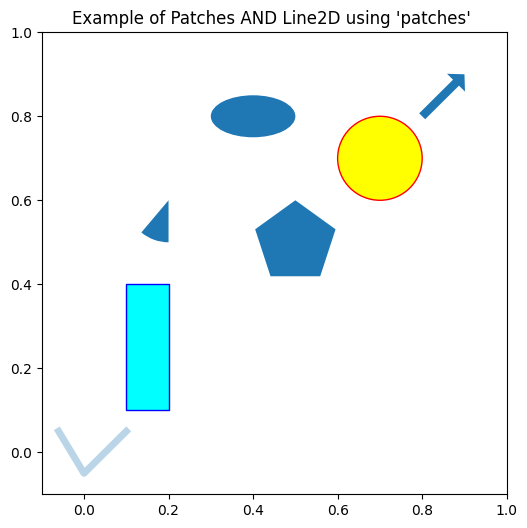

In [ ]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(6,6))
# Create a Line2D
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x, y, lw=5., alpha=0.3)##lw is width

# Create some patches
rect = mpatches.Rectangle((0.1, 0.1), 0.1, 0.3, edgecolor='blue', facecolor='cyan', linewidth=1)
# Create a circle
circle = mpatches.Circle((0.7, 0.7), 0.1, edgecolor='red', facecolor='yellow', linewidth=1)

# Create a wedge
wedge = mpatches.Wedge((0.2, 0.6), 0.1, 230, 270, ec="none") ###0,270 means that start and end points angels

# Create a polygon (center, numVertices, radius)
polygon = mpatches.RegularPolygon((0.5, 0.5), numVertices=5, radius=0.1) ###numVertices specifies the number of vertices (or sides) of the regular polygon.
# Create an elipse (center,height, width)
ellipse = mpatches.Ellipse((0.4,0.8), 0.2, 0.1)

# Create an arrow
arrow = mpatches.Arrow(x=0.8, y=0.8, dx=0.1, dy=0.1,
                       width=0.1)

# Add the patches to the axes
ax.add_line(line)

ax.add_patch(rect)
ax.add_patch(circle)
ax.add_patch(wedge)
ax.add_patch(polygon)
ax.add_patch(ellipse)
ax.add_patch(arrow)

# Set limits and show the plot
ax.set_xlim(-0.1, 1)
ax.set_ylim(-0.1, 1)
plt.title("Example of Patches AND Line2D using 'patches' ")
plt.show()



# Seaborn

Is a Python package - designed to work with Pandas DataFrames.<br>
It also gives us more graph types and layouts. It is perfectly compatible with Matplotlib.

## The goal of the following cell

Is to show you that `Seaborn` can save us time and effort by doing for us the data preparation, set the legend (and in the next lessons you'll see that even much more)



## Plotting line with Seaborn
### `sns.lineplot()`


see [documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

**📌 Confidence Interval (CI) shading in sns.lineplot:**  
By default, Seaborn adds a shaded area around each line to show the 95% confidence interval (CI) when using a statistical estimator like `mean`.  
This can be disabled using `errorbar=None` or `ci=None`.


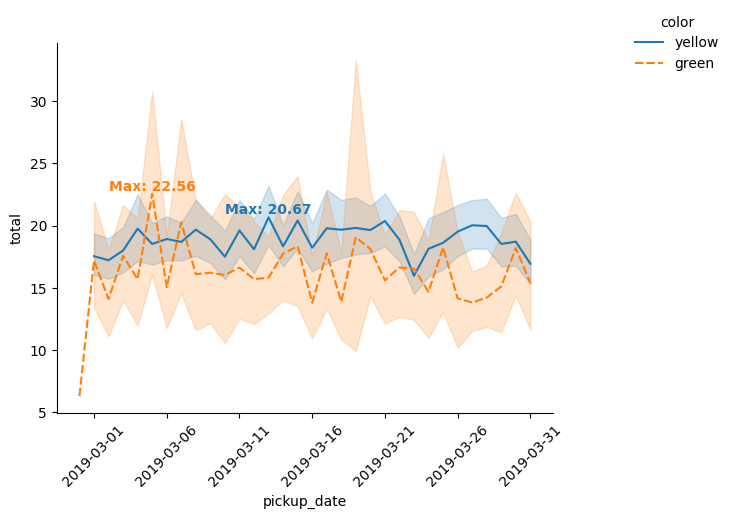

In [ ]:
lineplot = sns.lineplot(data=taxis, x='pickup_date',y='total', hue='color', style = 'color',estimator='mean' )
### hue: This parameter is used to group the data and assign different colors to each group.
#style: This parameter is used to differentiate lines by varying their style (e.g., solid, dashed).


# Annotate the maximum points
for line in lineplot.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()


    if len(y_data) > 0:  # Check if y_data is not empty
        # Find the index of the maximum y-value
        max_idx = np.argmax(y_data)

        # Annotate the maximum point
        plt.text(x_data[max_idx], y_data[max_idx], f'Max: {y_data[max_idx]:.2f}',
                 ha='center', va='bottom', color=line.get_color(), fontsize=10, fontweight='bold')#ha for horizontal alignment

sns.move_legend(lineplot, "center", bbox_to_anchor=(1.25,1), frameon=False)

lineplot.set_xticks(pivot_result.index[::5])
plt.xticks(rotation=45)

#Removes the top and right borders (spines) from the plot for a cleaner, modern look.
sns.despine()


In [ ]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30


## Plotting Histogram with Matplotlib Using `ax.hist()`

The hist() function has quite a few parameters that you can check in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

We will be using here the following:

*   bins
*   color
*   edgecolor
*   alpha
*   density
*   cumulative

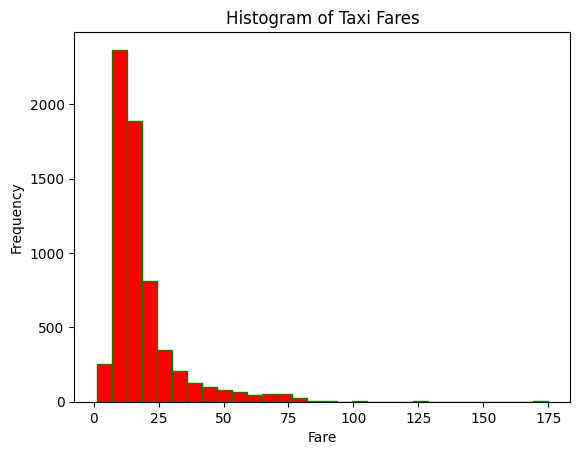

In [ ]:

# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram
# The simplest way
#ax.hist(taxis['total'])

# Changing the number of bins and changing the color of the bar's frame
ax.hist(taxis['total'], bins=30, edgecolor='green',color='red')

# hist() also returns some objects we can work with
# n - the height of each bar
# bins - a list with the value of the edges of the bins (where they start and end).
# patches - a list of patches.Rectangle (we will see later how to use them)
# n, bins, patches = ax.hist(taxis['total'], bins=30, edgecolor='white')

# Set the title and labels
ax.set_title('Histogram of Taxi Fares')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

## Frequency on the Y axis Instead of Counts

Sometimes we want to see the frequency (relative part) of each bin out of the entire data and not the absolute count.<br>
In that case we can set the `density = True` inside `ax.hist()`.

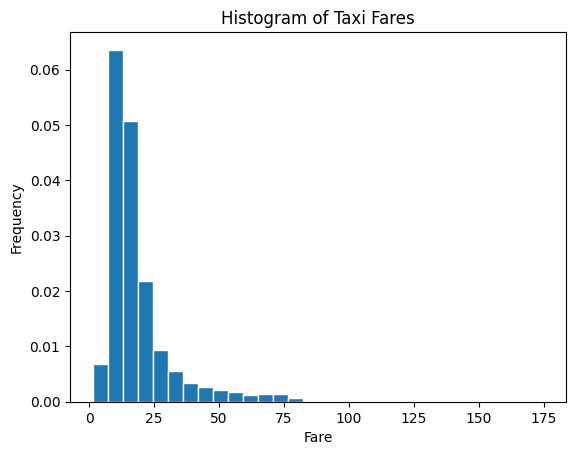

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram
ax.hist(taxis['total'], bins=30, edgecolor='white', density = True)### density = True

# Set the title and labels
ax.set_title('Histogram of Taxi Fares')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

If we want to format the Y axis to present the percentage, instead of the fraction, we can use `ax.yaxis.set_major_formatter()`

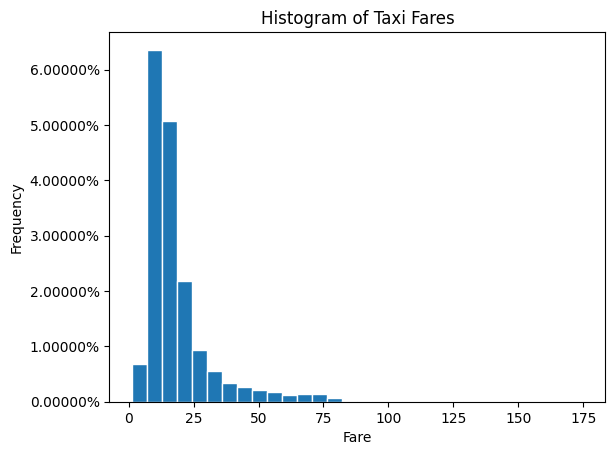

In [ ]:
import matplotlib.ticker as mticker

# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram
ax.hist(taxis['total'], bins=30, edgecolor='white', density = True)

# Set the title and labels
ax.set_title('Histogram of Taxi Fares')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))#### 0 is the number of digitis after the point

# Show the plot
plt.show()

Lets see how we can use the objects `ax.hist()` returns

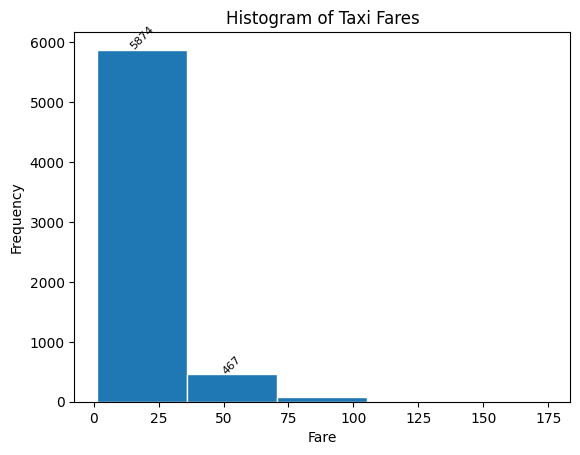

In [ ]:

# Create the figure and axes
fig, ax = plt.subplots()
# Create the histogram
# n, bins, patches = ax.hist(taxis['total'], bins=30, edgecolor='black')
n, bins, patches = ax.hist(taxis['total'], bins=5, edgecolor='white')
### n: The values of the histogram bins.
#bins: The edges of the bins.
#patches: The list of individual patches used to create the histogram.

# Annotate the histogram with the counts
for patch in patches:
    height = patch.get_height()
    if height > 100:
      left_edge = patch.get_x()
      width = patch.get_width()
      bin_center = left_edge + width / 2
      ax.text(bin_center, height + 0.5, f'{int(height)}', ha='center',fontsize = 8, rotation=45) # ha means horizontal alignment


# Set the title and labels
ax.set_title('Histogram of Taxi Fares')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
for patch in patches:
    height = patch.get_height()
    print(height)

5874.0
467.0
83.0
5.0
4.0


Same like the previous, but with `density = True`

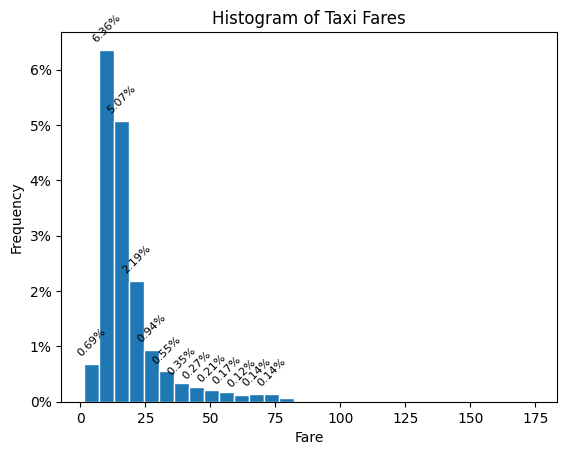

In [ ]:
import matplotlib.ticker as mticker  # Import the ticker module

# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram
# n, bins, patches = ax.hist(taxis['total'], bins=30, edgecolor='black')
n, bins, patches = ax.hist(taxis['total'], bins=30, edgecolor='white', density = True)

# Annotate the histogram with the frequency and rotate the text
for patch in patches:
    height = patch.get_height()
    if height > 0.001:
      left_edge = patch.get_x()
      width = patch.get_width()
      bin_center = left_edge + width / 2
      ax.text(bin_center, height + 0.001, f'{height:.2%}', ha='center', va='bottom', rotation=45, fontsize=8)


# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Set the title and labels
ax.set_title('Histogram of Taxi Fares')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

### Two Histograms together

Sometimes we want to compare two histograms on the same Axes.<br>
We will take the folowing actions:

*   group taxis by color of taxi (`taxis.groupby('color')`)
*   for each group in the group by
    * plot ax.hist()
    * grab the plot's patches and use them to write text on the relevant bar


(moving forward we will see other possibilities to compar histograms, using subplots)

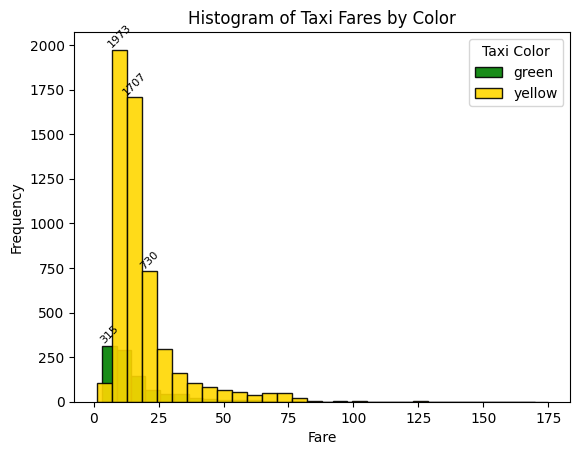

In [ ]:

# Create the figure and axes
fig, ax = plt.subplots()

# Define colors for each taxi color category
colors = {
    'yellow': 'gold',
    'green': 'green'
}

# Plot a histogram for each taxi color category
for color, group_data in taxis.groupby('color'):
    data = group_data['total']
    n,bins, patches = ax.hist(data, bins=30, alpha=0.9, edgecolor='black', label=color, color=colors[color])

    # Annotate the histogram with the counts and rotate the text
    for patch in patches:
        height = patch.get_height()
        if height > 300:
          left_edge = patch.get_x()
          width = patch.get_width()
          bin_center = left_edge + width / 2
          ax.text(bin_center, height + 0.5, f'{int(height)}', ha='center', va='bottom', rotation=45, fontsize=8)

# Set the title and labels
ax.set_title('Histogram of Taxi Fares by Color')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# Add a legend
ax.legend(title='Taxi Color')

# Show the plot
plt.show()


But when we compare histograms, we usually want to see the relative height of each bar (percentage) and not the absolute height.

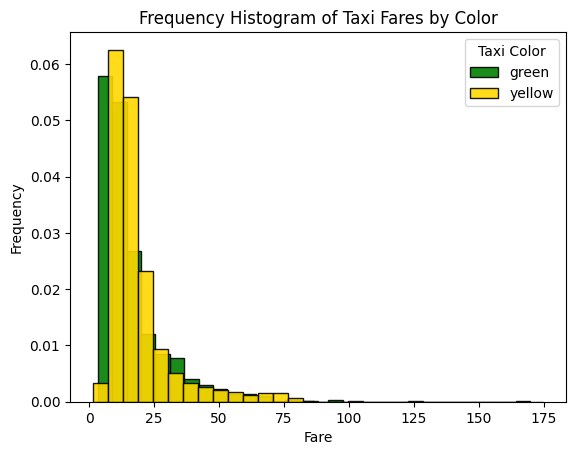

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 'taxis' dataset from Seaborn
taxis = sns.load_dataset('taxis')

# Create the figure and axes
fig, ax = plt.subplots()

# Define colors for each taxi color category
colors = {
    'yellow': 'gold',
    'green': 'green'
}

# Plot a histogram for each taxi color category
for color, group_data in taxis.groupby('color'):
    data = group_data['total']
    n, bins, patches = ax.hist(data, bins=30, density=True, alpha=0.9, edgecolor='black', label=color, color=colors[color])


# Set the title and labels
ax.set_title('Frequency Histogram of Taxi Fares by Color')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# Add a legend
ax.legend(title='Taxi Color')

# Show the plot
plt.show()


In [ ]:
for color, group_data in taxis.groupby('color'):
  print(color)

green
yellow


### Cumulative Distribution

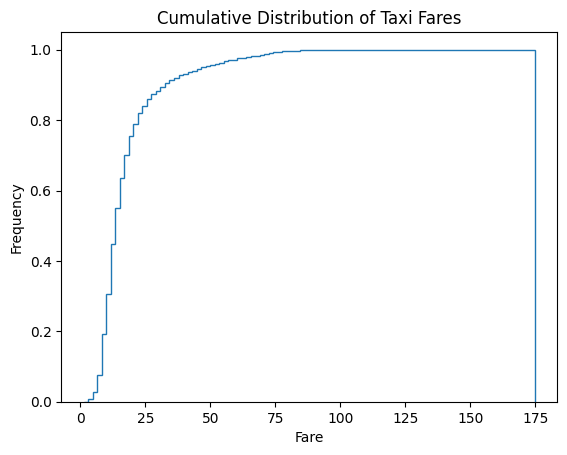

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram
ax.hist(taxis['total'], bins=100, cumulative=True, density=True , histtype='step')


# Set the title and labels
ax.set_title('Cumulative Distribution of Taxi Fares')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# ax.axvline(taxis.total.median(), c="black", linestyle="--")
# ax.axhline(0.5, c="black", linestyle="--")


# Show the plot
plt.show()

NameError: name 'np' is not defined

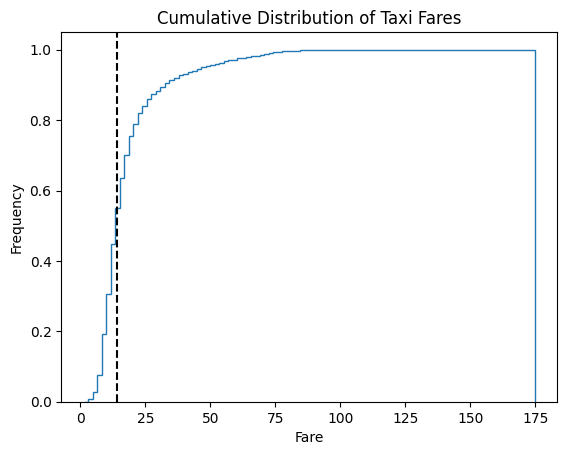

In [ ]:


# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram
ax.hist(taxis['total'], bins=100, cumulative=True, density=True, histtype='step')

# Set the title and labels
ax.set_title('Cumulative Distribution of Taxi Fares')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')

# Add vertical line at the median
ax.axvline(taxis['total'].median(), color="black", linestyle="--")############################################add this line

# Add horizontal line at 0.5

# Define the ticks and labels for the x-axis
ticks = np.linspace(taxis['total'].min(), taxis['total'].max(), num=25)  # Adjust num for more/less ticks
ax.set_xticks(ticks)
ax.set_xticklabels([f'{tick:.2f}' for tick in ticks], rotation=45)  # Optional: Rotate labels for better readability

# Show the plot
plt.show()


In [ ]:
taxis.total.median()

14.16

# Advanced Customizations With Matplotlib
Goals of the Next Section

*   Learn how to build figures that contain multiple Axes
*   Customize colors using colormaps
*   Customize charts with stylesheets



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import auth
import gspread
from google.auth import default
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read the data

In [ ]:
file_path  = '/content/drive/MyDrive/PandasSeabornNobelPrizeTutorial/stocks.csv'
stocks = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
stocks.columns = stocks.columns.str.lower()
stocks.index.name = stocks.index.name.lower()

stocks.head()

,ticker,open,high,low,close,adj close,volume
date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:
# Use the pivot function to reshape the DataFrame
stocks_pivoted = stocks.pivot(columns='ticker', values='close') # .reset_index()
# stocks_pivoted.set_index('date', inplace=True)
stocks_pivoted.columns = stocks_pivoted.columns.str.lower()

stocks_pivoted.head()

ticker,aapl,goog,msft,nflx
date,,,,
2023-02-07,154.649994,108.040001,267.559998,362.950012
2023-02-08,151.919998,100.000000,266.730011,366.829987
2023-02-09,150.869995,95.459999,263.619995,362.500000
2023-02-10,151.009995,94.860001,263.100006,347.359985
2023-02-13,153.850006,95.000000,271.320007,358.570007


## Subplots

When we run the command `fig, ax = plt.subplots(rows, columns)` we create a grid with the specified number of rows and columns.

When you do not specify any number `fig, ax = plt.subplots()` like what we did the last lesson, you get a grid of 1 row and 1 column - meaning just one Axes.

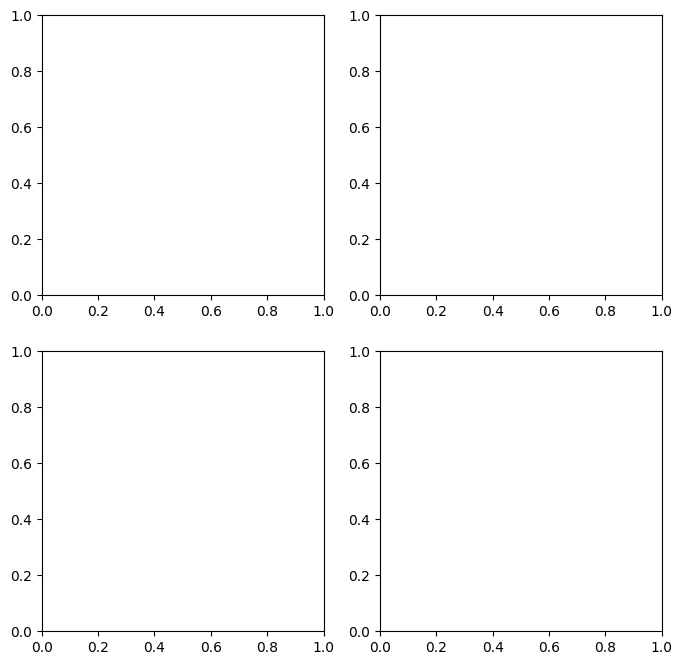

In [ ]:
# create a figure that contains a 2x2 grid - meaning - with 4 total Axes
fig, ax = plt.subplots(2,2, figsize=(8,8))

### Let's examine the grid that was created

*   The upper row is row number 0. The lower row is row number 1.
*   The left column is column number 0. The right column is column number 1.

If we want to plot inside the upper left Axes, we need to specify it:<br>
`ax[0][0].plot(stocks_pivoted['goog'])`



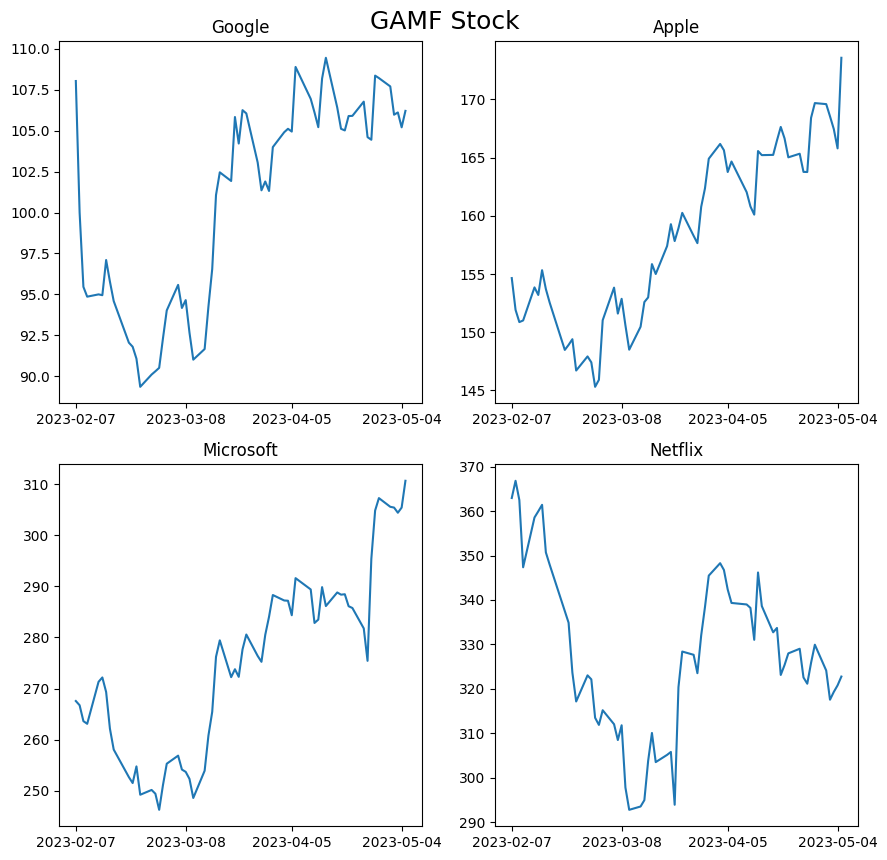

In [ ]:
# create a figure that contains a 2x2 grid - meaning - with 4 total Axes
fig, ax = plt.subplots(2,2, figsize=(9,9))

# Super title for the entire figure
plt.suptitle('GAMF Stock', fontsize=18, y=.95)

# Plopulating the upper left Axes with google's data
ax[0][0].plot(stocks_pivoted['goog'])
ax[0][0].set_title('Google')
ax[0][0].set_xticks(stocks_pivoted.index[::20])

# Plopulating the upper right Axes with apples's data
ax[0][1].plot(stocks_pivoted['aapl'])
ax[0][1].set_title('Apple')
ax[0][1].set_xticks(stocks_pivoted.index[::20])

# Plopulating the lower right Axes with microsoft's data
ax[1][0].plot(stocks_pivoted['msft'])
ax[1][0].set_title('Microsoft')
ax[1][0].set_xticks(stocks_pivoted.index[::20])

# Plopulating the lower right Axes with netflix's data
ax[1][1].plot(stocks_pivoted['nflx'])
ax[1][1].set_title('Netflix')
ax[1][1].set_xticks(stocks_pivoted.index[::20])

# making sure that ticks from one subplot will not overlap with
# ticks from the other subplots.
# In this case it is probebly wont make any change, but if you'll ever need this function,
# it is good to know it exists.
plt.tight_layout() # <<<<<<<<<<<<<<

plt.show()



### Sharing X or Y axis

We can make the Axes share axis limits, by using the `sarex` or `sharey` argument. Can be set to: `"all"`, `"row"` or `"col"`.

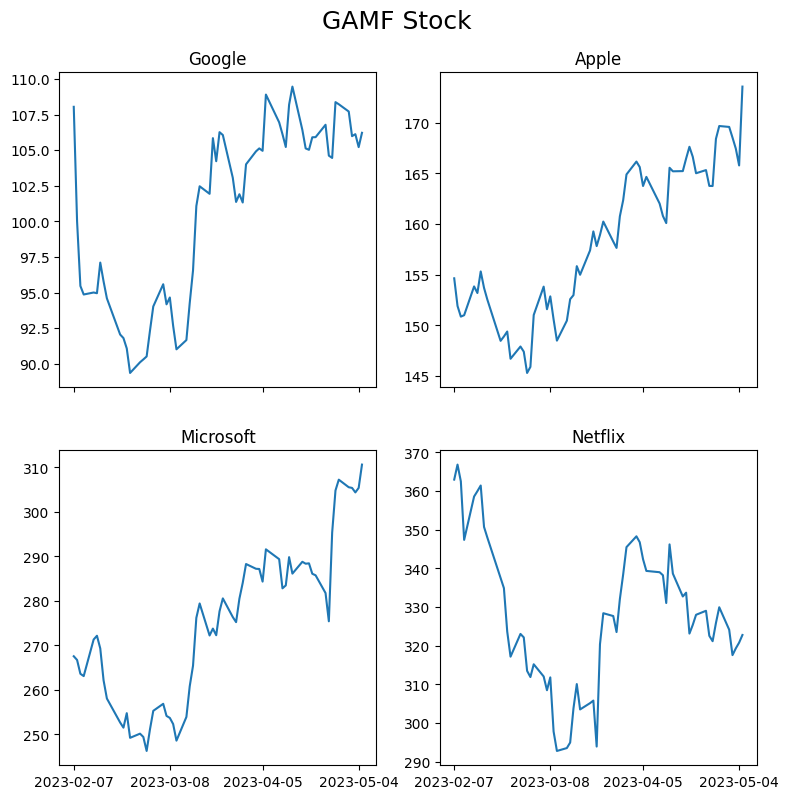

In [ ]:
# create a figure that contains a 2x2 grid - meaning - with 4 total Axes
fig, ax = plt.subplots(2,2, figsize=(9,9), sharex="all")########sharex

# Super title for the entire figure
plt.suptitle('GAMF Stock', fontsize=18, y=.95)

# Plopulating the upper left Axes with google's data
ax[0][0].plot(stocks_pivoted['goog'])
ax[0][0].set_title('Google')
ax[0][0].set_xticks(stocks_pivoted.index[::20])

# Plopulating the upper right Axes with apples's data
ax[0][1].plot(stocks_pivoted['aapl'])
ax[0][1].set_title('Apple')
ax[0][1].set_xticks(stocks_pivoted.index[::20])

# Plopulating the lower right Axes with microsoft's data
ax[1][0].plot(stocks_pivoted['msft'])
ax[1][0].set_title('Microsoft')
ax[1][0].set_xticks(stocks_pivoted.index[::20])

# Plopulating the lower right Axes with netflix's data
ax[1][1].plot(stocks_pivoted['nflx'])
ax[1][1].set_title('Netflix')
ax[1][1].set_xticks(stocks_pivoted.index[::20])

plt.show()



A great example for how shared axis may help us is by showing the distributions of the groups on the same scale. We can clearly compare the distributions.

*   Try to plot them once with shared x axis and once with out

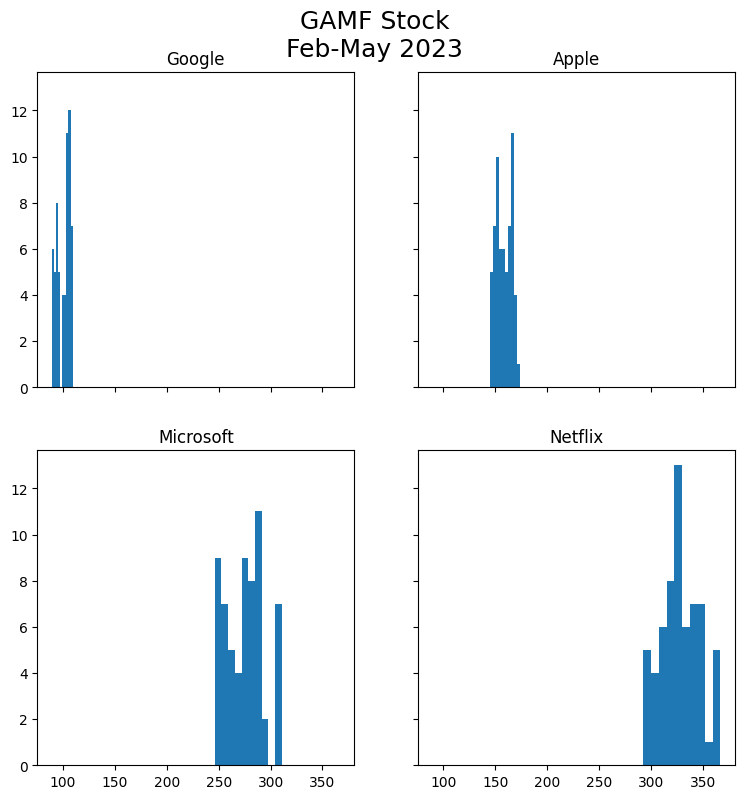

In [ ]:
# create a figure that contains a 2x2 grid - meaning - with 4 total Axes
fig, ax = plt.subplots(2,2, figsize=(9,9), sharex="all", sharey="all")

# Super title for the entire figure
plt.suptitle('GAMF Stock\nFeb-May 2023', fontsize=18, y=.95)
# Plopulating the upper left Axes with google's data
ax[0][0].hist(stocks_pivoted['goog'])
ax[0][0].set_title('Google')

# Plopulating the upper right Axes with apples's data
ax[0][1].hist(stocks_pivoted['aapl'])
ax[0][1].set_title('Apple')

# Plopulating the lower right Axes with microsoft's data
ax[1][0].hist(stocks_pivoted['msft'])
ax[1][0].set_title('Microsoft')

# Plopulating the lower right Axes with netflix's data
ax[1][1].hist(stocks_pivoted['nflx'])
ax[1][1].set_title('Netflix')

plt.show()



❌ __Note__: when the two plots have very different scales it does not make any sense to use shared axis ❌

### We can mix types of graphs in the grid

* They dont have to be all from the same type.
* You can use this functionality when you want to explore your dataset and observe multiple graphs at the same time.

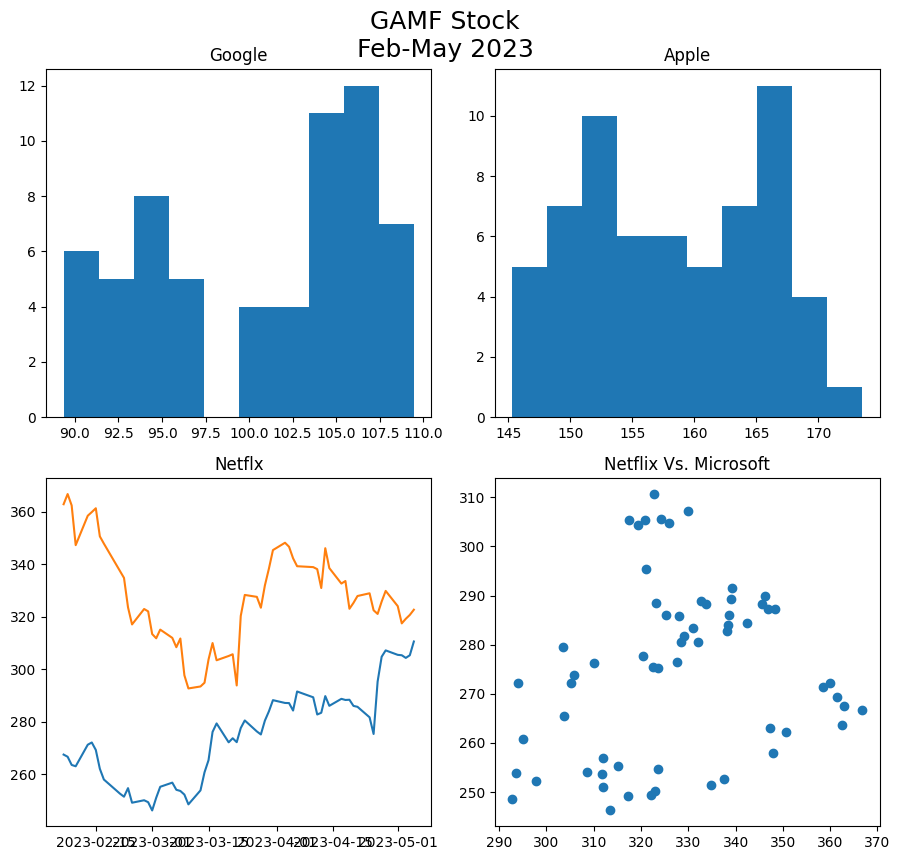

In [ ]:
# create a figure that contains a 2x2 grid - meaning - with 4 total Axes
fig, ax = plt.subplots(2,2, figsize=(9,9))

# Super title for the entire figure
plt.suptitle('GAMF Stock\nFeb-May 2023', fontsize=18, y=.95)
# Plopulating the upper left Axes with google's data
ax[0][0].hist(stocks_pivoted['goog'])####################hist
ax[0][0].set_title('Google')








# Plopulating the upper right Axes with apples's data
ax[0][1].hist(stocks_pivoted['aapl'])####################hist
ax[0][1].set_title('Apple')






# Plopulating the lower right Axes with microsoft's data
ax[1][0].plot(stocks_pivoted['msft'])####################hist
ax[1][0].set_title('Microsoft')

# Plopulating the lower right Axes with netflix's data
ax[1][0].plot(stocks_pivoted['nflx'])
ax[1][0].set_title('Netflx')





# Plopulating the lower right Axes with netflix's data
ax[1][1].scatter(stocks_pivoted['nflx'],stocks_pivoted['msft'])
ax[1][1].set_title('Netflix Vs. Microsoft')




plt.tight_layout()
plt.show()



### Different type of syntax

In Matplotlib there are many ways to create plots.<br>
Until now we've used one type of syntax - the object oriented syntax. But yyou should be also familiar with the following syntax, because you'll see it out there.

Our good old `fig, ax = plt.subplots()` actually execute a very similar code behind the scene.

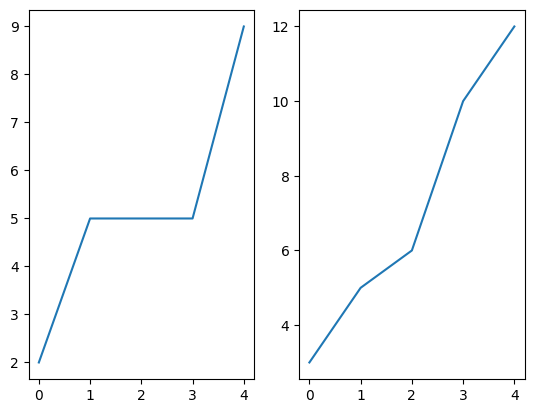

In [ ]:
# Create a Figure that contains 2 Axes
fig = plt.figure(2)

# Create data to plot
x = [0, 1, 2, 3, 4]
numbers = [2,5,5,5,9]
more_numbers = [3,5,6,10,12]

# fig.add_subplot(121) can be understood as follows:
# What does 121 means?
# With the first one "1" you are telling matplotlib that your figure is
# compost of 1 row.
# With the number "2", you are telling matplotlib that your figure is
# compost of 2 columns.
# And the last number tells it where you want to position the subplot that you are referring to.

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(numbers)
ax2.plot(x, more_numbers)

plt.show()

### Creating subplots with a loop

With the same syntax you can draw your charts iteratively

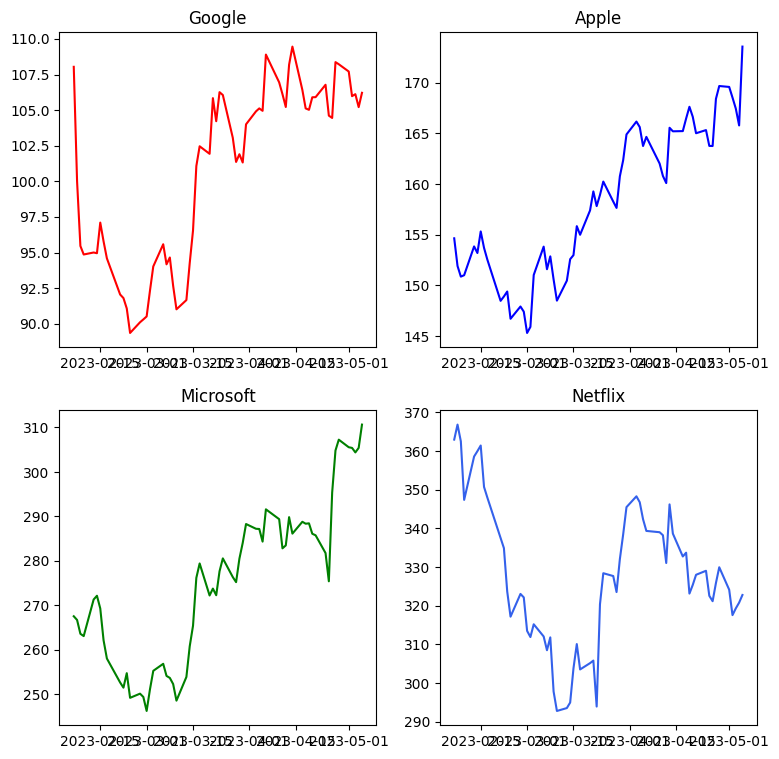

In [ ]:
# Iterate and Add

fig = plt.figure(figsize=(9, 9))

column_list = ["goog", "aapl", "msft", "nflx"]
title_list = ["Google", "Apple", "Microsoft", "Netflix"]
colors = ['red', 'blue', 'green', '#3461eb']

ax_list = []

nrows, ncols = (2, 2)

for i in range(1, len(column_list) + 1):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.plot(stocks_pivoted.index, stocks_pivoted[f"{column_list[i-1]}"], c= colors[i-1] )

    ax.set_title(f"{title_list[i-1]}")
    ax_list.append(ax)

#     if (i-1) % 2 != 0:
#         ax.set_yticks([])

# ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
# ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

In [ ]:
column_list[2]

'msft'

In [ ]:
ax_list

[<Axes: title={'center': 'Google'}>,
 <Axes: title={'center': 'Apple'}>,
 <Axes: title={'center': 'Microsoft'}>,
 <Axes: title={'center': 'Netflix'}>]

### GridSpec

What if we need subplots that do not have equal size?<br>
In this case we need to work with `GridSpec`.<br>

`GreedSpec` allows us to divide the figure into rows and columns (similar to the idea of pixels in an image). We can then specify whic pixels will be dedicated to which subplot.


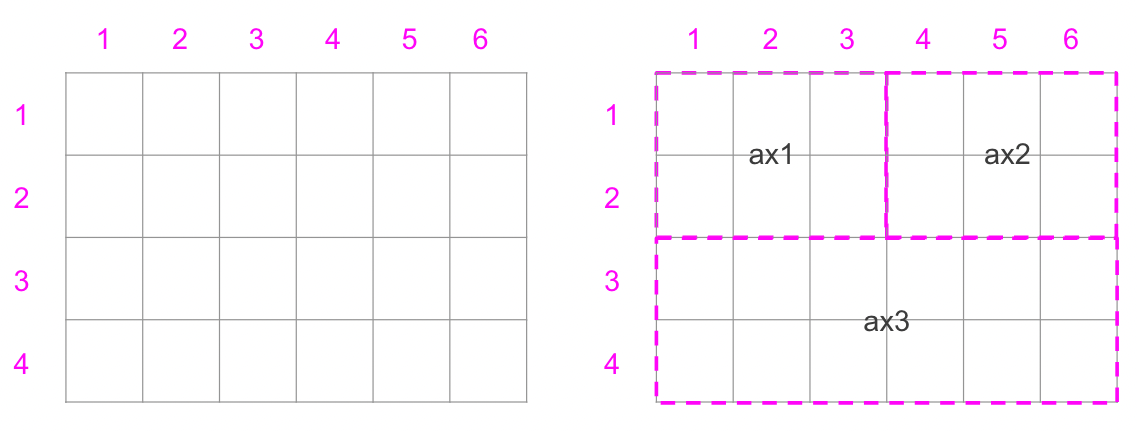

In [ ]:
from matplotlib.gridspec import GridSpec

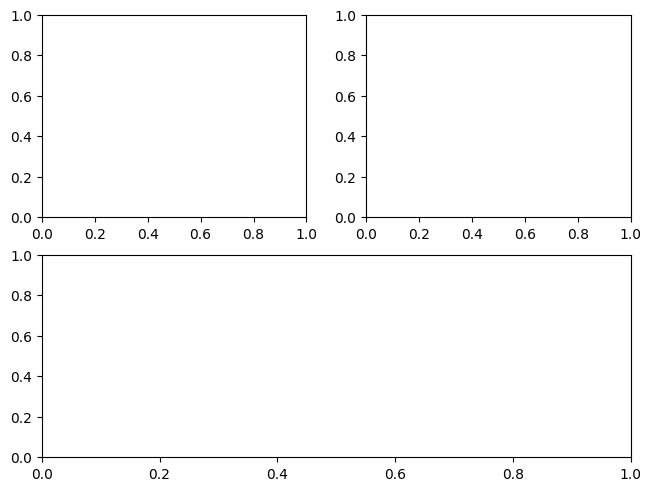

In [ ]:
fig = plt.figure(constrained_layout=True)

grid = GridSpec(4, 6, figure=fig)##### we set 4 rows and 6 cols

ax1 = fig.add_subplot(grid[0:2, 0:3])
ax2 = fig.add_subplot(grid[:2,3:])
ax3 = fig.add_subplot(grid[2:,:])### from the third row and from the forth col

In [ ]:
|---------|---------|---------|---------|---------|---------|
| 0,0     | 0,1     | 0,2     |        |         |         |
|---------|---------|---------|---------|---------|---------|
| 1,0     | 1,1     | 1,2     |         |         |         | #### this is the ax1, the left value is the row index and the right value is the col index
|---------|---------|---------|---------|---------|---------|
|         |         |         |         |         |         |
|---------|---------|---------|---------|---------|---------|
|         |         |         |         |         |         |
|---------|---------|---------|---------|---------|---------|

In [ ]:
|---------|---------|---------|---------|---------|---------|
|         |         |         |         |         |         |
|---------|---------|---------|---------|---------|---------|
|         |         |         |         |         |         |#### this is the ax3
|---------|---------|---------|---------|---------|---------|
| 2,0     | 2,1     | 2,2     | 2,3     | 2,4     | 2,5     |
|---------|---------|---------|---------|---------|---------|
| 3,0     | 3,1     | 3,2     | 3,3     | 3,4     | 3,5     |
|---------|---------|---------|---------|---------|---------|

In [ ]:
import seaborn as sns
# https://github.com/mwaskom/seaborn-data
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


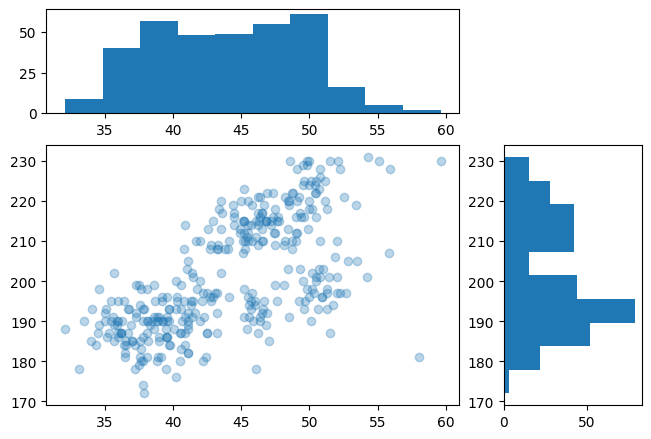

In [ ]:
fig = plt.figure(constrained_layout=True)



grid = GridSpec(8, 8, figure=fig)

ax1 = fig.add_subplot(grid[2:7, 0:6])

ax1.scatter(
    penguins["bill_length_mm"],
    penguins["flipper_length_mm"],
    alpha=.3
           )

ax2 = fig.add_subplot(grid[0:2, 0:6])

ax2.hist(penguins["bill_length_mm"])




ax3 = fig.add_subplot(grid[2:7, 6:])
ax3.hist(penguins["flipper_length_mm"],
        orientation="horizontal")

plt.show()

### Color Maps

As can be seen from the [documentation](https://matplotlib.org/stable/users/prev_whats_new/dflt_style_changes.html), matplotlib work with a default color palette called "tab10".

When you plot more than one plot in a figure, your first plot will get the blue color, the second orange, third green etc...<br>
When you will get to the 11th plot inside the same figure, the cycle will start all over again.

The default color palette is not the only palette.<br>
In this section we will learn how to change color palette or create one of your own.

See [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html) all the available color palettes.



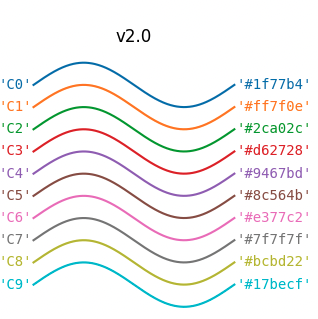

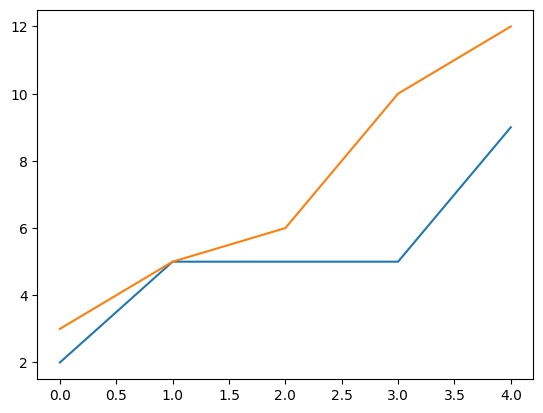

In [ ]:
# Change color cycler
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", ['red','green', 'pink'])


fig, ax = plt.subplots()

# Create data to plot
x = [0, 1, 2, 3, 4]
numbers = [2,5,5,5,9]
more_numbers = [3,5,6,10,12]

ax.plot(x, numbers)
ax.plot(x, more_numbers)

plt.show()

## Chaning Style Sheets

* A style sheet is the collection of parameters that create the "design" style that our plots show. They are pre-configured.

For example, our default style sheets includes the following:

*   White backgound
*   No grid lines
*   All borders are visible
*   and more...


By running the command `plt.style.use('<name of an existing style>')` we can change styles.

The list of all existing styles can be found by running `plt.style.available`.



In [ ]:
# Changing the style to ggplot
plt.style.use('ggplot')

from now on all our charts will be styled in ggplot's style - until we will change the style again.

Compare the following graphs to the last ones we've created (same code - different style).

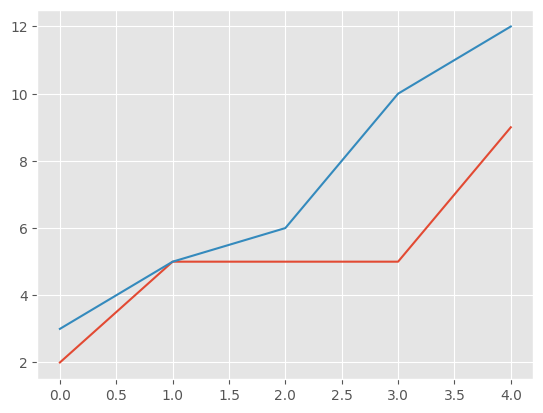

In [ ]:

fig, ax = plt.subplots()

# Create data to plot
x = [0, 1, 2, 3, 4]
numbers = [2,5,5,5,9]
more_numbers = [3,5,6,10,12]

ax.plot(x, numbers)
ax.plot(x, more_numbers)

plt.show()

In [ ]:
# Changing the style to Solarize_Light2 🤮
plt.style.use('Solarize_Light2')

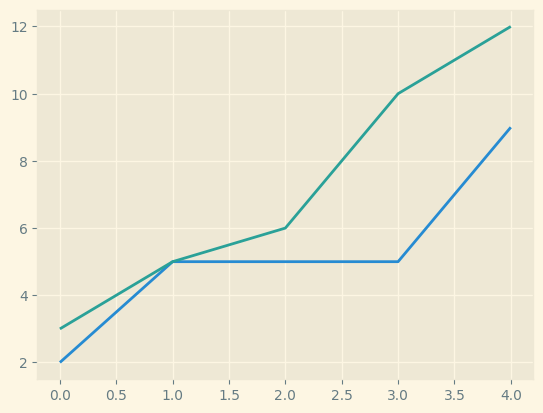

In [ ]:
fig, ax = plt.subplots()

# Create data to plot
x = [0, 1, 2, 3, 4]
numbers = [2,5,5,5,9]
more_numbers = [3,5,6,10,12]

ax.plot(x, numbers)
ax.plot(x, more_numbers)

plt.show()

In [ ]:
# Changing the style to fivethirtyeight
plt.style.use('fivethirtyeight')

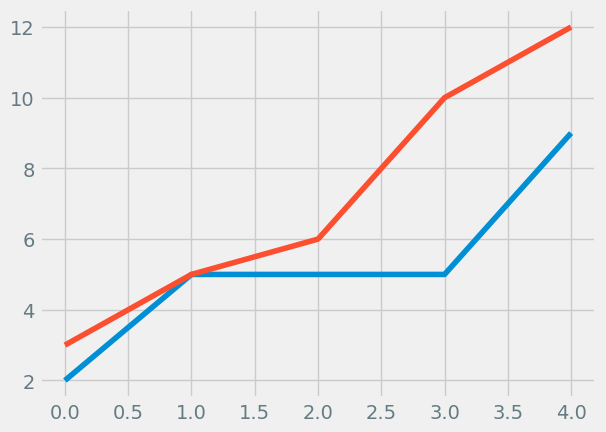

In [ ]:
fig, ax = plt.subplots()

# Create data to plot
x = [0, 1, 2, 3, 4]
numbers = [2,5,5,5,9]
more_numbers = [3,5,6,10,12]

ax.plot(x, numbers)
ax.plot(x, more_numbers)

plt.show()

In [ ]:
# Reverting to the default style
plt.style.use('default')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Runtime Configuration Parameters (`rcParameters`)

When we run `plt.style.use()` we can easily change the style of our graophs.<br>
But `plt.style.use` actually changes certain parameters behind the scene.<br>
If we want to reach these parameters and change some of them, we can do that.

There are almost 400 parameters that you can change.

[This](https://matplotlib.org/stable/users/explain/customizing.html) page in the documentation can help you understand how to change any parameter.

In [ ]:
# by running plt.style.library[] we can see the parameters of each style.
plt.style.library['fivethirtyeight']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': '#f0f0f0',
          'axes.facecolor': '#f0f0f0',
          'axes.grid': True,
          'axes.labelsize': 'large',
          'axes.linewidth': 3.0,
          'axes.prop_cycle': cycler('color', ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']),
          'axes.titlesize': 'x-large',
          'figure.facecolor': '#f0f0f0',
          'figure.subplot.bottom': 0.07,
          'figure.subplot.left': 0.08,
          'figure.subplot.right': 0.95,
          'font.size': 14.0,
          'grid.color': '#cbcbcb',
          'grid.linestyle': '-',
          'grid.linewidth': 1.0,
          'legend.fancybox': True,
          'lines.linewidth': 4.0,
          'lines.solid_capstyle': <CapStyle.butt: 'butt'>,
          'patch.edgecolor': '#f0f0f0',
          'patch.linewidth': 0.5,
          'svg.fonttype': 'path',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.major.size': 0.0,
    

In [ ]:
# By running the following, we can see ALL the possible configurations and their current value
# We can always pick a parameter from this list to change
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

There are two ways to change rc parameters:

*   Assignment - change an individual parameter
*   `rc()` function - change multiple parameters together



In [ ]:
# Using the rc() function to
# Set the top and right spine to be false for all plots from now on (untile we will change it)
plt.rc("axes.spines", top=True, right=False)
# Set the axes titlesize to 18 instead of the default 16.
plt.rc("axes", titlesize=1)

# Using assignment to set figsize and linestyle
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["lines.linestyle"] = "--"

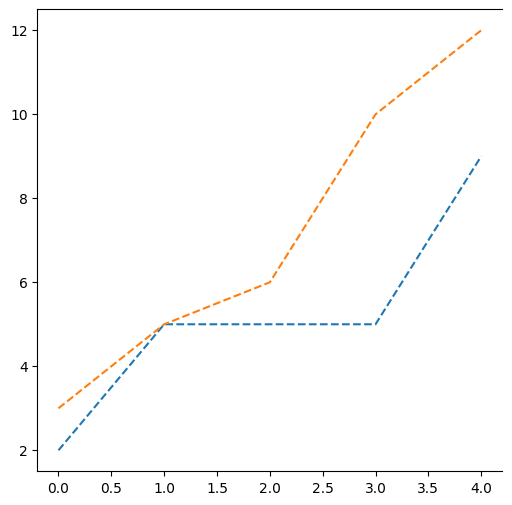

In [ ]:
fig, ax = plt.subplots()

# Create data to plot
x = [0, 1, 2, 3, 4]
numbers = [2,5,5,5,9]
more_numbers = [3,5,6,10,12]

ax.plot(x, numbers)
ax.plot(x, more_numbers)

plt.show()